# Example of match data analysis

In [1]:
import datetime

import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
PLAYER_SID = 1572500566 # MDZ_Jimmy

file_name = f"player_{PLAYER_SID}_sf6_matches.xlsx"

In [3]:
df = pd.read_excel(file_name)

df

,main_player_name,main_player_sid,main_player_character,main_player_score,main_player_mr,main_player_input_type,main_player_platform,opposite_player_name,opposite_player_sid,opposite_player_character,opposite_player_score,opposite_player_mr,opposite_player_input_type,opposite_player_platform,match_won,left_side,uploaded_at,replay_id,replay_battle_type_name
0,MDZ_jimmY,1572500566,Ryu,1,1716,0,Steam,Yunie,2867447641,Cammy,2,1701,0,Steam,0,0,2025-02-14 20:43:48,QPSQ66ALX,Ranked Match
1,MDZ_jimmY,1572500566,Ryu,1,1725,0,Steam,Yunie,2867447641,Cammy,2,1692,0,Steam,0,0,2025-02-14 20:41:21,P5GYLBXET,Ranked Match
2,MDZ_jimmY,1572500566,Ryu,2,1716,0,Steam,Septasonium,2183969370,Zangief,0,1781,0,Steam,1,1,2025-02-14 20:37:00,8HNT4KGN4,Ranked Match
3,MDZ_jimmY,1572500566,Ryu,2,1706,0,Steam,Septasonium,2183969370,Zangief,1,1791,0,Steam,1,1,2025-02-14 20:35:14,JXACD6793,Ranked Match
4,MDZ_jimmY,1572500566,Ryu,0,1710,0,Steam,Keyn,1058376180,Terry,2,1878,0,Steam,0,0,2025-02-14 20:31:30,VF8ANUM9N,Ranked Match
5,MDZ_jimmY,1572500566,Ryu,1,1715,0,Steam,Keyn,1058376180,Terry,2,1873,0,Steam,0,0,2025-02-14 20:29:43,KRKDUVRC9,Ranked Match
6,MDZ_jimmY,1572500566,Ryu,2,1707,0,Steam,Baka_P2,3015334639,Edmond Honda,0,1704,0,Steam,1,0,2025-02-14 20:27:05,ETEJUQTWQ,Ranked Match
7,MDZ_jimmY,1572500566,Ryu,2,1699,0,Steam,Baka_P2,3015334639,Edmond Honda,1,1712,0,Steam,1,0,2025-02-14 20:25:34,SKXBTATTG,Ranked Match
8,MDZ_jimmY,1572500566,Ryu,0,1707,0,Steam,Baka_P2,3015334639,Edmond Honda,2,1704,0,Steam,0,0,2025-02-14 20:22:28,YBYF5SSV4,Ranked Match
9,MDZ_jimmY,1572500566,Ryu,2,1700,0,Steam,Lukey,3330516809,Luke,1,1662,0,Steam,1,0,2025-02-14 20:17:57,LNYRVXX5H,Ranked Match


Text(0.5, 1.0, 'Match type repartition')

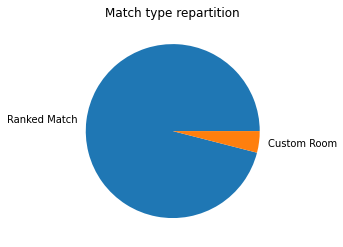

In [4]:
df["replay_battle_type_name"].value_counts().plot.pie()
plt.ylabel(None)
plt.title("Match type repartition")

### Average of match won

In [5]:
df["match_won"].mean()

0.48

### Average of match won depending of player side

In [6]:
df[["left_side", "match_won"]].groupby("left_side").mean()

,match_won
left_side,
0,0.46875
1,0.50000


### Average of match won depending of opposite character

In [7]:
df[["opposite_player_character", "match_won"]].groupby("opposite_player_character").mean()

,match_won
opposite_player_character,
A.K.I.,0.000000
Akuma,0.625000
Blanka,1.000000
Cammy,0.400000
Dee Jay,0.333333
Dhalsim,0.454545
Ed,0.000000
Edmond Honda,0.400000
JP,0.500000


### Plot ranked match MR evolution

Text(0.5, 1.0, 'Ranked matches MR Evolution')

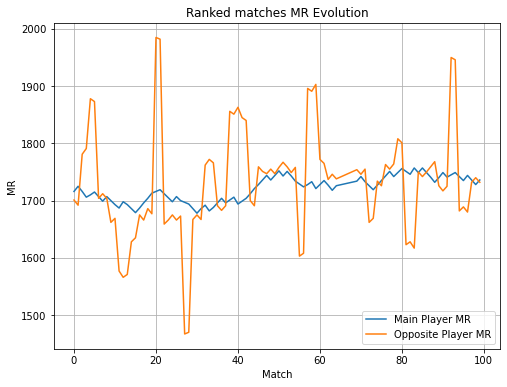

In [8]:
df_ranked = df[df["replay_battle_type_name"] == "Ranked Match"]

plt.figure(figsize=(8, 6))

plt.plot(df_ranked["main_player_mr"], label="Main Player MR")
plt.plot(df_ranked["opposite_player_mr"], label="Opposite Player MR")

plt.grid(True)
plt.legend()
plt.xlabel("Match")
plt.ylabel("MR")
plt.title("Ranked matches MR Evolution")